# Neural Network using Iris dataset

In [53]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np



In [54]:
# Create a model class that inherits `nn.Module`

class  IrisDatasetModel(nn.Module):
  # Input layer ( 4 features of the flower : sepal length, sepal width, petal length, petal width)
  # --> Hidden layer 1(number of neurons)
  # --> H2 (n)
  # --> output (3 class of iris flowers: Iris Setosa, Iris Versicolour, Iris Virginica)

  def __init__(self, in_features=4, h1=13, h2=15, out_features=3):
    super().__init__()    # initantiate our nn.Module
    # print(f"in_feat : {h1}, h1 : {h1}, h2 : {h2}, out_features: {out_features}")
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)
  # def __init__(self):
  #   super().__init__()    # initantiate our nn.Module
  #   self.fc1 = nn.Linear(4, 8)
  #   self.fc2 = nn.Linear(8, 9)
  #   self.out = nn.Linear(9, 3)

  def forward(self, x: torch.Tensor) -> torch.Tensor :
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x



In [55]:
RANDOM = 31
# pick a manual seed for reproducibility
torch.manual_seed(RANDOM)

# create an instance of the model
model_0 = IrisDatasetModel()
# model, model.state_dict()

In [56]:
list(model_0.parameters())

[Parameter containing:
 tensor([[-0.2702, -0.0782, -0.2250,  0.0173],
         [-0.2999,  0.0276,  0.1387, -0.0156],
         [-0.2096, -0.1999, -0.4492, -0.1074],
         [ 0.0437, -0.4737,  0.0715,  0.1611],
         [-0.2148, -0.3602, -0.3551,  0.2162],
         [ 0.3863,  0.2342,  0.3927,  0.3888],
         [-0.3485,  0.1383,  0.3673,  0.3752],
         [-0.2472,  0.3562,  0.2372,  0.4845],
         [-0.1552,  0.3903, -0.4812, -0.0868],
         [-0.3228,  0.4181,  0.0695, -0.3738],
         [-0.1004,  0.2239,  0.0295, -0.1423],
         [-0.2519,  0.0351, -0.0465,  0.4427],
         [ 0.2154, -0.3264,  0.4857, -0.1453]], requires_grad=True),
 Parameter containing:
 tensor([-0.4118,  0.0815, -0.0352, -0.3205, -0.3180,  0.1000, -0.4783, -0.2402,
          0.2576, -0.0182, -0.2126,  0.3374, -0.3707], requires_grad=True),
 Parameter containing:
 tensor([[-0.0574,  0.1984, -0.0627,  0.2480,  0.0019,  0.2265, -0.0015,  0.1384,
           0.1701,  0.1075, -0.1490, -0.2216, -0.0660],
   

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [58]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_dataframe = pd.read_csv(url)


In [59]:
my_dataframe

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [60]:
my_dataframe['variety'] = my_dataframe['variety'].replace("Setosa",0.0)
my_dataframe['variety'] = my_dataframe['variety'].replace("Versicolor",1.0)
my_dataframe['variety'] = my_dataframe['variety'].replace("Virginica",2.0)

In [61]:
my_dataframe

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [62]:
# Train test splitting! set  X, y
X = my_dataframe.drop('variety', axis=1)
y = my_dataframe['variety']


In [63]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [89]:
# Split test split
"""
Test size = 20%
train size = 80%
"""

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM)


train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]



In [88]:
# in built function to split the data
type(X_train), type(X_test), type(y_train), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [86]:
# manual split
type(X_train), type(X_test), type(y_train), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [94]:
len(X_train), len(y_train), len(X_test),  len(y_test)

(120, 120, 30, 30)

In [112]:
print(f"X_train shape = {X_train.shape} - X_test shape = {X_test.shape} ")
print(f"y_train shape = {X_train.shape} - y_test shape = {y_train.shape}")

X_train shape = (120, 4) - X_test shape = (30, 4) 
y_train shape = (120, 4) - y_test shape = (120,)


## data visualization using matplotlib

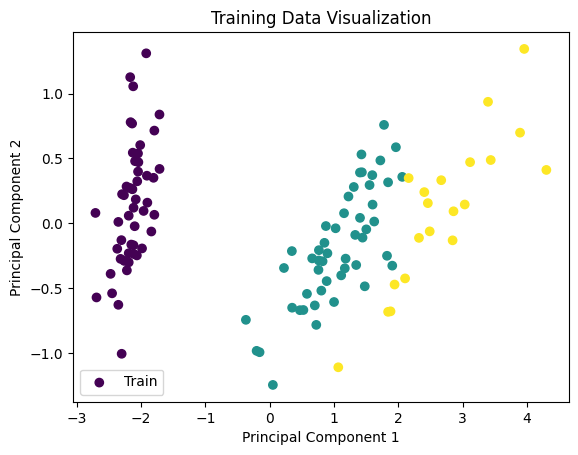

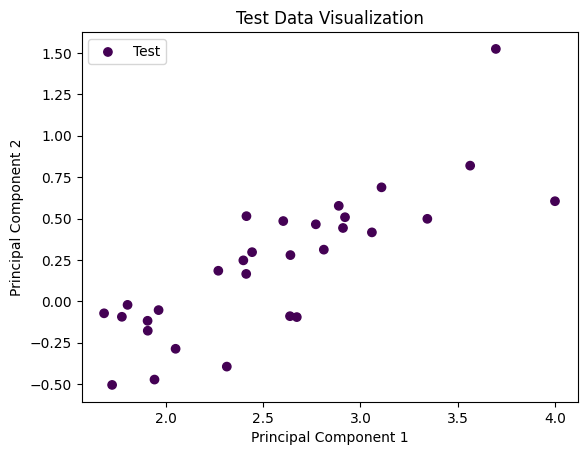

In [113]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X_train and X_test are your feature matrices, and y_train and y_test are your labels

# Use PCA to reduce dimensionality for visualization (adjust n_components as needed)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Visualize the training data
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', label='Train')
plt.title('Training Data Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Visualize the test data
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', label='Test')
plt.title('Test Data Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


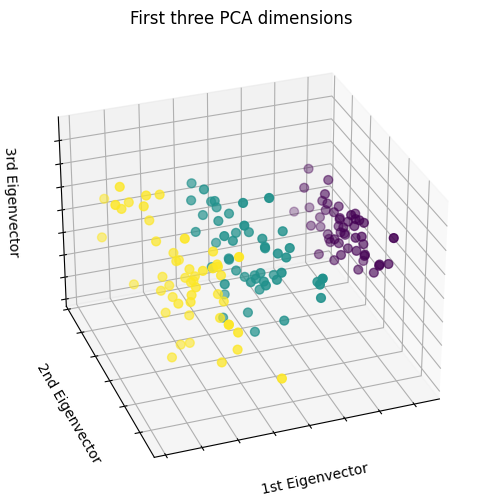

In [117]:
from sklearn import datasets

iris = datasets.load_iris()


# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

In [65]:
# converting X features to float tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)


In [66]:
# Converting y labels to tensor long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [67]:
# Set the criteria of model to measure the erro, how far off the prediction are from the data
criteria = nn.CrossEntropyLoss() # loss function

# Choose Optimizer, lr = learning rate (if erro doesn't go down after a bunch of iteration (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.01)

In [68]:
model_0.parameters

<bound method Module.parameters of IrisDatasetModel(
  (fc1): Linear(in_features=4, out_features=13, bias=True)
  (fc2): Linear(in_features=13, out_features=15, bias=True)
  (out): Linear(in_features=15, out_features=3, bias=True)
)>

In [69]:
# Train our model

# epochs ? ( one run through all the training data in our network)
epochs = 200

loss_values = []
epoch_count = []

for epoch in range(epochs):
  # model_0.train()

  # Go forward and get a prediction
  # basically means forward pass
  y_pred = model_0.forward(X_train)   # get the predicted result

  # measure the loss/error
  loss = criteria(y_pred, y_train)    # predicted values vs the y_train

  # print on every 10 epoch
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    print(f"Epoch: {epoch} and loss : {loss}")

  # backpropagation :- take the error of the previous step and feed it back through the network
  # to fine tune the parameters
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss : 1.1400972604751587
Epoch: 10 and loss : 0.9413363337516785
Epoch: 20 and loss : 0.6700056791305542
Epoch: 30 and loss : 0.3779221475124359
Epoch: 40 and loss : 0.2023150473833084
Epoch: 50 and loss : 0.09338031709194183
Epoch: 60 and loss : 0.052762679755687714
Epoch: 70 and loss : 0.03897128254175186
Epoch: 80 and loss : 0.032737504690885544
Epoch: 90 and loss : 0.02899477630853653
Epoch: 100 and loss : 0.02627052552998066
Epoch: 110 and loss : 0.024121960625052452
Epoch: 120 and loss : 0.02235816977918148
Epoch: 130 and loss : 0.02086477540433407
Epoch: 140 and loss : 0.019564837217330933
Epoch: 150 and loss : 0.01840483956038952
Epoch: 160 and loss : 0.017350753769278526
Epoch: 170 and loss : 0.016380002722144127
Epoch: 180 and loss : 0.015479124151170254
Epoch: 190 and loss : 0.014637342654168606


In [70]:
epoch_count, loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(1.1401, grad_fn=<NllLossBackward0>),
  tensor(0.9413, grad_fn=<NllLossBackward0>),
  tensor(0.6700, grad_fn=<NllLossBackward0>),
  tensor(0.3779, grad_fn=<NllLossBackward0>),
  tensor(0.2023, grad_fn=<NllLossBackward0>),
  tensor(0.0934, grad_fn=<NllLossBackward0>),
  tensor(0.0528, grad_fn=<NllLossBackward0>),
  tensor(0.0390, grad_fn=<NllLossBackward0>),
  tensor(0.0327, grad_fn=<NllLossBackward0>),
  tensor(0.0290, grad_fn=<NllLossBackward0>),
  tensor(0.0263, grad_fn=<NllLossBackward0>),
  tensor(0.0241, grad_fn=<NllLossBackward0>),
  tensor(0.0224, grad_fn=<NllLossBackward0>),
  tensor(0.0209, grad_fn=<NllLossBackward0>),
  tensor(0.0196, grad_fn=<NllLossBackward0>),
  tensor(0.0184, grad_fn=<NllLossBackward0>),
  tensor(0.0174, grad_fn=<NllLossBackward0>),
  tensor(0.0164, grad_fn=<NllLossBackward0>),
  tensor(0.0155, grad_fn=<NllLossBackward0

Text(0.5, 0, 'Epoch')

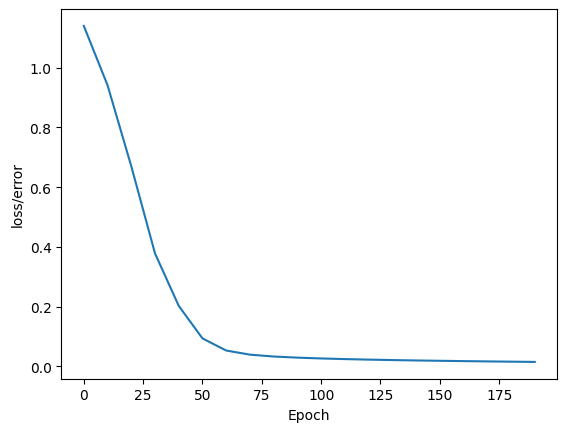

In [71]:
# Graph it out
plt.plot(epoch_count, torch.tensor(loss_values).cpu().numpy())
plt.ylabel("loss/error")
plt.xlabel("Epoch")

In [72]:
# Evaluate model on the test dataset (validate model on the test set )
with torch.inference_mode(): # <- turn off the backpropagation
  y_eval = model_0.forward(X_test)    # X_test are the features from the test set, y_eval will the prediction of the model
  loss = criteria(y_eval, y_test)     # loss



In [73]:
loss

tensor(0.2621)

In [83]:
def print_item(item):
    if item == 0:
      x = "Setosa"
    elif item == 1:
      x = "Versicolor"
    else:
      x = "Virginica"

    return x


correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model_0.forward(data)

    predicted_flower = print_item(y_val.argmax().item())

    correct_flower = print_item(y_test[i])


    # will tell that what types of flower class our network thinks it
    hit_miss= "  - miss" if predicted_flower!= correct_flower else "  - hit"
    print(f"{i+1:3}|  predicted tensor : {str(y_val):38}   |   correct: {y_test[i]} - {correct_flower:12} |  predicted: {y_val.argmax().item()} - {predicted_flower:20} | {hit_miss} ")



    # correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f"we got {correct} correct")

  1|  predicted tensor : tensor([-4.1212,  4.6919, -0.0585])      |   correct: 1 - Versicolor   |  predicted: 1 - Versicolor           |   - hit 
  2|  predicted tensor : tensor([-11.5530,  -4.3749,  13.2192])   |   correct: 2 - Virginica    |  predicted: 2 - Virginica            |   - hit 
  3|  predicted tensor : tensor([ 10.1479,   1.9961, -13.4101])   |   correct: 0 - Setosa       |  predicted: 0 - Setosa               |   - hit 
  4|  predicted tensor : tensor([-2.3746,  6.7994, -3.1251])      |   correct: 1 - Versicolor   |  predicted: 1 - Versicolor           |   - hit 
  5|  predicted tensor : tensor([-9.4180, -0.9199,  8.7385])      |   correct: 2 - Virginica    |  predicted: 2 - Virginica            |   - hit 
  6|  predicted tensor : tensor([  9.8937,   2.1503, -13.1942])   |   correct: 0 - Setosa       |  predicted: 0 - Setosa               |   - hit 
  7|  predicted tensor : tensor([-6.9495,  1.5475,  4.7620])      |   correct: 2 - Virginica    |  predicted: 2 - Virginica 

# Evaluate the new data on the network

In [75]:
# new data to evaluate
new_iris = torch.tensor([4.7, 4.2, 1.3, 0.2])


In [76]:
with torch.no_grad():
  print(model_0(new_iris))

tensor([ 11.8907,   1.7815, -15.4369])


In [77]:
newer_iris = torch.tensor([5.9,3.0, 5.1, 1.8])
with torch.no_grad():
  print(model_0(newer_iris))

tensor([-7.7686,  0.2137,  6.4768])


# Saving and load our NN model


In [78]:
from google.colab import drive
drive.mount('/content/drive')

torch.save(model_0.state_dict(),'drive/MyDrive/models/model_from_iris.pt')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading the saved model

In [79]:
saved_model = IrisDatasetModel()

In [80]:
saved_model.state_dict()

OrderedDict([('fc1.weight',
              tensor([[ 0.3298,  0.3746, -0.0425, -0.4322],
                      [ 0.3318,  0.2112, -0.4302,  0.2749],
                      [-0.3141,  0.4431, -0.2441,  0.4795],
                      [ 0.4757, -0.4838,  0.3304,  0.3954],
                      [-0.3672,  0.1522, -0.1491, -0.0574],
                      [ 0.4599, -0.2142,  0.1616,  0.1999],
                      [ 0.1345,  0.4934, -0.1345,  0.1558],
                      [-0.4463,  0.1194,  0.0949,  0.3816],
                      [ 0.2099, -0.1926,  0.2638,  0.3767],
                      [-0.1481,  0.0042, -0.1717, -0.4041],
                      [-0.0910, -0.2276, -0.4707,  0.1472],
                      [-0.0428, -0.4239,  0.3426, -0.2467],
                      [ 0.4539, -0.4637, -0.0863,  0.0392]])),
             ('fc1.bias',
              tensor([ 0.3505, -0.1065, -0.4549, -0.2411, -0.1078,  0.1211,  0.2112, -0.2081,
                       0.3951, -0.0246, -0.3644, -0.0774,  0.2820])),

In [81]:
saved_model.load_state_dict(torch.load('model_from_iris.pt'))

FileNotFoundError: ignored

In [ ]:
saved_model.eval()

In [ ]:
!pip install google-colab
